In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

In [2]:
from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04


In [7]:
file_name = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v0_looseeta_240317_treefit_BCS/topo/resultfile/result_etapip_pipipi/*.root'
# file_name = '/home/jykim/ntuple_10e5.root'
file_name = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/240405_tight_v1_treefit_BCS_etapi0const/topo/resultfile/result_etapip_pipipi/*.root'

 
base_filter = 'Dp_M'

tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_chiProb','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1","eta_Pi0_Easym",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz','Pip_p','Pip_pt','etapip_pipipi_rank',\
             'iProdBrP_Dsp_0','iProdBrP_Dp_0','iCascDcyBrP_Dp_0','iCascDcyBrCcP_Dp_0','iCascDcyBrP_Dsp_0','iCascDcyBrCcP_Dsp_0']


In [8]:
pd_df_v0 = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=variables)

runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "__experiment__" is not in a dataset and is not a custom column been defined.

In [9]:
# cut = "etapip_pipipi_rank==1 & Dp_chiProb>0.01"
cut = "etapip_pipipi_rank==1"

# cut = "Dp_M>0"

pd_df_test=pd_df_v0.query(cut)

# pd_df_test=pd_df_test.query("etapip_pipipi_rank==1")

pd_df_test

NameError: name 'pd_df_v0' is not defined

690630


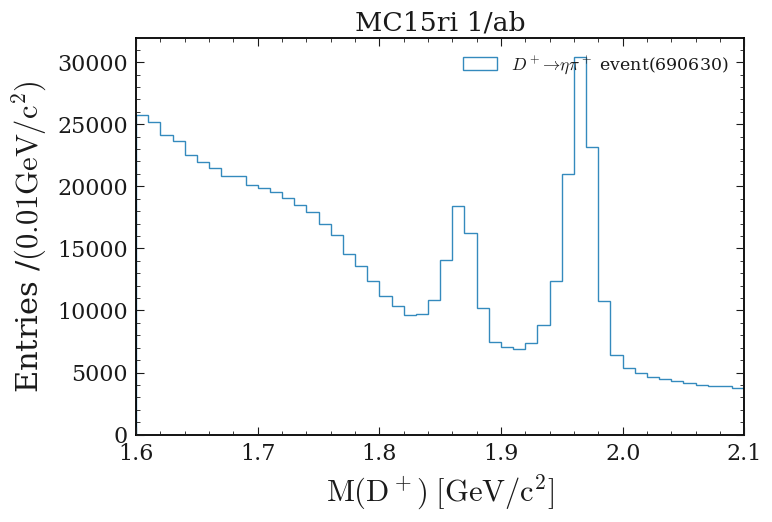

In [145]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ event(' + str(N_df) +')');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

690755


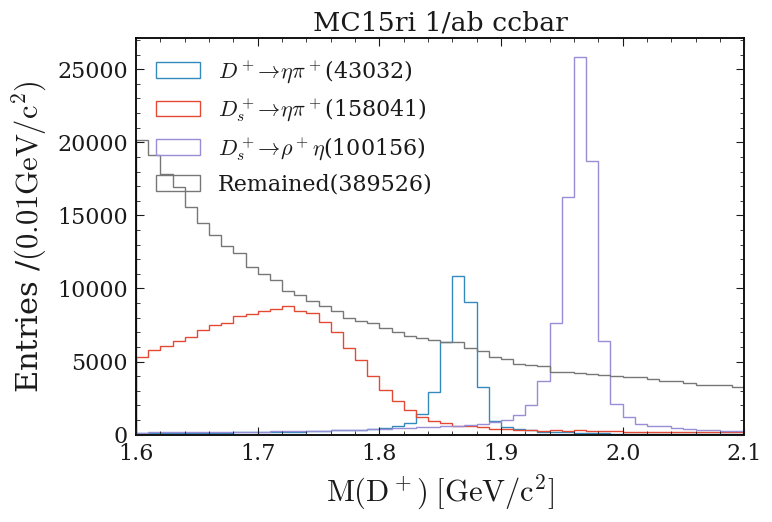

In [157]:
figure_size_inches = (8, 5.5)  # Width, Height
fig = plt.figure(figsize=figure_size_inches)
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

cut1 = "(iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0) & (iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3) & (iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5)"
cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0 & \
                iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3 & \
                iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5"
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \eta \pi^+$(' + str(N_df2) +')');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+_s \to \rho^+ \eta$(' + str(N_df3) +')');
plt.hist(df_rest["Dp_M"],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()

# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

690892


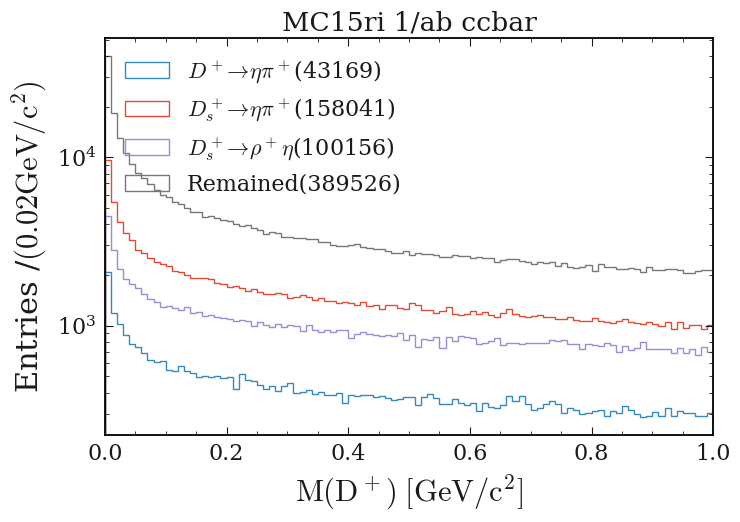

In [147]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,101)

xm = np.linspace(*xrange)

cut1 = "iCascDcyBrP_Dp_0==0 | iCascDcyBrCcP_Dp_0==0"
cut2 = "(iCascDcyBrP_Dsp_0==3 | iCascDcyBrCcP_Dsp_0==3) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0) "
cut3 = "(iCascDcyBrP_Dsp_0==5 | iCascDcyBrCcP_Dsp_0==5) & (iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0)"

remained_cut = "iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0 & \
                iCascDcyBrP_Dsp_0!=3 & iCascDcyBrCcP_Dsp_0!=3 & \
                iCascDcyBrP_Dsp_0!=5 & iCascDcyBrCcP_Dsp_0!=5"
df = pd_df_test.query(cut1)
df2 = pd_df_test.query(cut2)
df3 = pd_df_test.query(cut3)
df_rest = pd_df_test.query(remained_cut)


# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=0 & iCascDcyBrCcP_Dp_0!=0")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)
N_df_rest = len(df_rest)

value = "Dp_chiProb"
plt.hist(df[value],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$(' + str(N_df) +')' );
plt.hist(df2[value],bins=xm,histtype='step',label=r'$D^+_s \to \eta \pi^+$(' + str(N_df2) +')' );
plt.hist(df3[value],bins=xm,histtype='step',label=r'$D^+_s \to \rho^+ \eta$(' + str(N_df3) +')');
plt.hist(df_rest[value],bins=xm,histtype='step',label=r'Remained(' + str(N_df_rest) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab ccbar' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.legend(loc="upper left")

plt.tight_layout()
plt.yscale('log')
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(N_df+N_df2+N_df3+N_df_rest)

29172


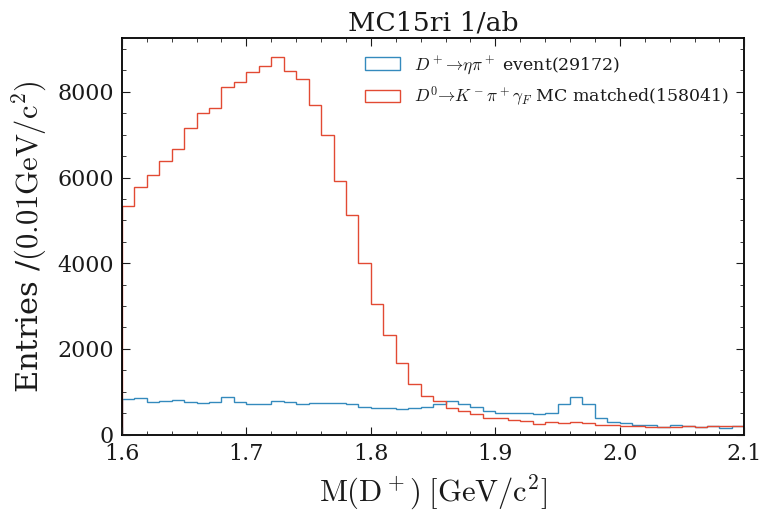

In [150]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

df = pd_df_test.query("iCascDcyBrP_Dp_0==8 | iCascDcyBrCcP_Dp_0==8")
# df2 = pd_df_test.query("iCascDcyBrP_Dp_0!=8 & iCascDcyBrCcP_Dp_0!=8")

# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ event(' + str(N_df) +')');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
plt.savefig("test.png")
print(len(df))

In [ ]:
# pd_df_test['mcErrors'].unique()

Pixel width: 800.0
Pixel height: 550.0


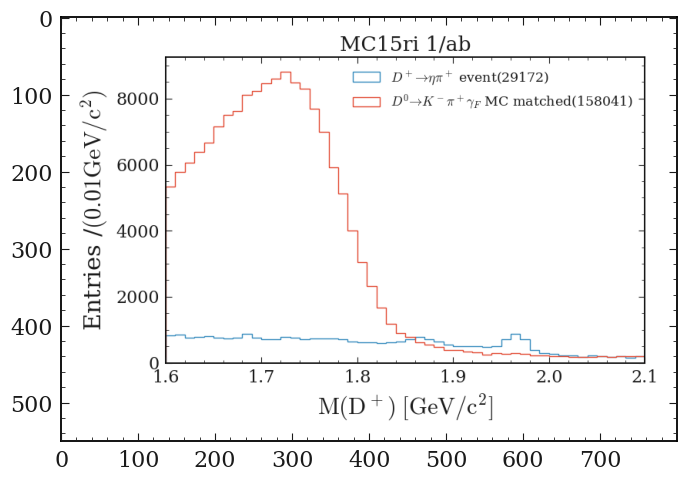

In [151]:
import matplotlib.pyplot as plt

# Load your image
image = plt.imread('test.png')

# Create a figure
fig, ax = plt.subplots()

# Plot the image on the figure
ax.imshow(image)

# Get the figure size in inches
fig_size_inches = fig.get_size_inches()

# Get the DPI (dots per inch) of the figure
dpi = fig.get_dpi()

# Calculate the pixel size
pixel_width = fig_size_inches[0] * dpi
pixel_height = fig_size_inches[1] * dpi

print("Pixel width:", pixel_width)
print("Pixel height:", pixel_height)

plt.show()
